In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
import numpy as np

In [3]:
model= keras.Sequential([layers.Dense(64,activation="relu"),
                        layers.Dense(10,activation="softmax")])

In [4]:
model=keras.Sequential(name="my_first_model")
model.add(layers.Dense(64, activation="relu", name="first_layers"))
model.add(layers.Dense(10,activation="softmax", name="Second_layer"))

In [5]:
model.build(input_shape=(None,3))

In [6]:
model.weights

[<tf.Variable 'first_layers/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.16852385, -0.2585755 , -0.05796601,  0.03671917,  0.15897119,
         -0.0938527 ,  0.13409886, -0.1592252 , -0.27644062, -0.21764725,
         -0.01274735, -0.1364775 ,  0.22715873, -0.12176059,  0.0414876 ,
         -0.11738485, -0.22416008, -0.22243425, -0.02120996, -0.03793934,
         -0.10083868,  0.01384118, -0.19562045,  0.00371814, -0.11733264,
          0.01510254,  0.02429795,  0.28217483, -0.14026955,  0.06784341,
         -0.24453104,  0.2073372 , -0.020026  ,  0.11984006, -0.17783225,
         -0.09937833,  0.2187851 , -0.21825457,  0.0108217 ,  0.21085119,
         -0.04341027, -0.14672706, -0.07457298, -0.04525888, -0.03485963,
         -0.15593159, -0.27187753,  0.2651475 , -0.26117176,  0.2170667 ,
         -0.2581352 , -0.1852591 ,  0.12958804, -0.11226667, -0.1496351 ,
          0.01976579,  0.26586813, -0.21238703,  0.02791589,  0.09639031,
         -0.04459101, -0.10377926, -0.

In [7]:
model.summary()

Model: "my_first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_layers (Dense)         (None, 64)                256       
_________________________________________________________________
Second_layer (Dense)         (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [8]:
inputs = keras.Input(shape=(3,), name="my_input")
features= layers.Dense(64, activation="relu")(inputs)
outputs= layers.Dense(10, activation="softmax")(features)
model_1=keras.Model(inputs= inputs, outputs=outputs)

In [9]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [10]:
vocabulary_size= 10000
num_tags=100
num_departments=4
title= keras.Input(shape=(vocabulary_size,), name= "Title")
text_body= keras.Input(shape=(vocabulary_size,),name="text_body")
tags= keras.Input(shape=(num_tags,), name="Tags")

features= layers.Concatenate()([title,text_body,tags])
features=layers.Dense(64, activation="relu")(features)
priority=layers.Dense(1,activation="sigmoid",name="priority")(features)
departments= layers.Dense(num_departments, activation="softmax", name="departments")(features)

Model_2= keras.Model(inputs=[title,text_body,tags],
                    outputs=[priority,departments])

In [11]:
import numpy as np

In [12]:
num_samples=1280
title_data= np.random.randint(0,2,size=(num_samples, vocabulary_size))
text_body_data=np.random.randint(0,2,size=(num_samples,vocabulary_size))
tags_data=np.random.randint(0,2,size=(num_samples,num_tags))
priority_data= np.random.random(size=(num_samples,1))
department_data=np.random.randint(0,2,size=(num_samples,num_departments))

In [13]:
Model_2.compile(optimizer="rmsprop",
             loss={"priority":"mean_squared_error", "departments":"categorical_crossentropy"},
             metrics={"priority":"mean_absolute_error", "departments":"accuracy"})
Model_2.fit({"Title":title_data,"text_body":text_body_data,"Tags":tags_data},
         {"priority":priority_data, "departments":department_data},
         epochs=1)


40/40 [==============================] - 1s 13ms/step - loss: 49.8991 - priority_loss: 0.2920 - departments_loss: 49.6070 - priority_mean_absolute_error: 0.4588 - departments_accuracy: 0.2954


In [14]:
Model_2.evaluate({"Title": title_data, "text_body": text_body_data,
                "Tags": tags_data},
               {"priority": priority_data, "departments": department_data})
priority_preds, department_preds = Model_2.predict(
    {"Title": title_data, "text_body": text_body_data, "Tags": tags_data})

40/40 [==============================] - 0s 5ms/step - loss: 41.3714 - priority_loss: 0.3343 - departments_loss: 41.0370 - priority_mean_absolute_error: 0.5004 - departments_accuracy: 0.5586


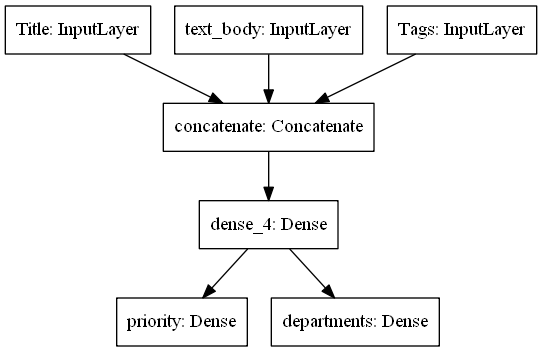

In [15]:
keras.utils.plot_model(Model_2, "plot_image.png")

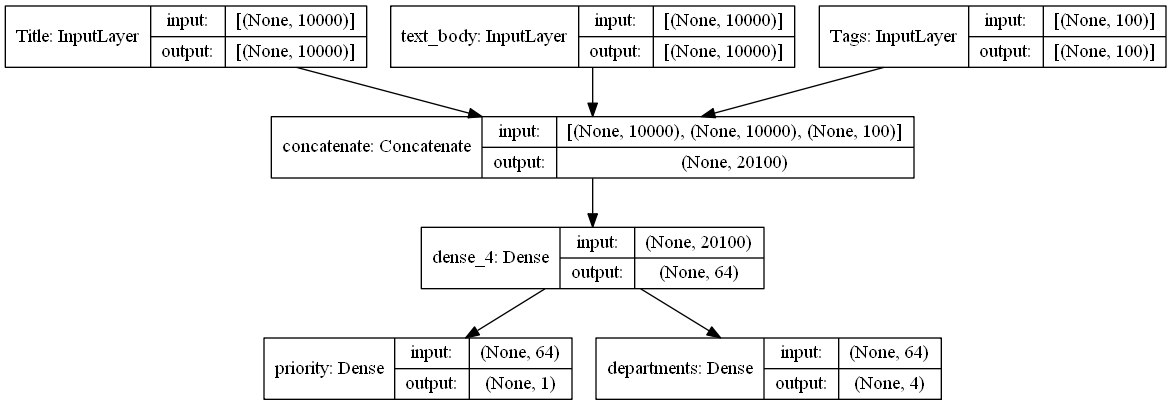

In [16]:
keras.utils.plot_model(Model_2, "plot_image_with_shape.png", show_shapes=True)

In [17]:
Model_2.layers

In [18]:
features= Model_2.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model= keras.Model(inputs=[title,text_body,tags ],
                      outputs=[priority,departments,difficulty])

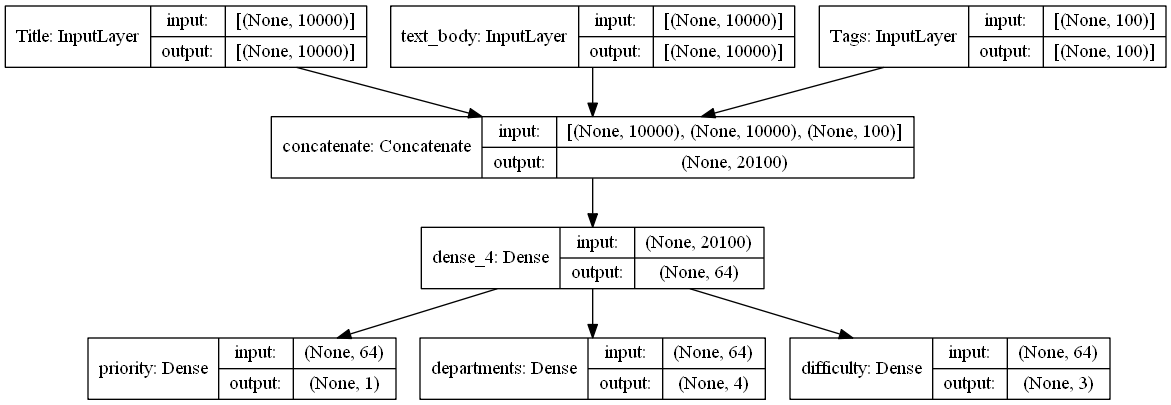

In [19]:
keras.utils.plot_model(new_model, "new_model.png", show_shapes=True)

In [54]:
from tensorflow.keras.datasets import mnist
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features= layers.Dense(512,activation="relu")(inputs)
    features=layers.Dropout(0.5)(features)
    outputs=layers.Dense(10, activation="softmax")(features)
    model= keras.Model(inputs=inputs, outputs=outputs)
    return model
model_3= get_mnist_model()
(images, labels),(test_images, test_label)= mnist.load_data()
print(images.shape)

(60000, 28, 28)


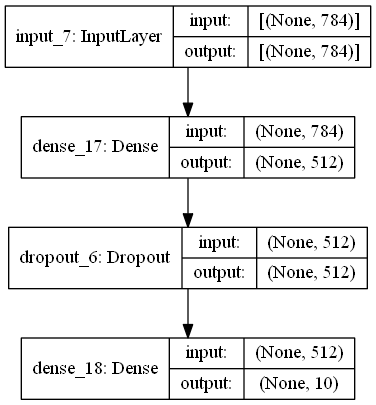

In [55]:
keras.utils.plot_model(model_3, "model.png", show_shapes=True)

In [56]:
images= images.reshape((60000,28*28)).astype("float32")/255
test_images= test_images.reshape((10000,28*28)).astype("float32")/255
train_images, val_images= images[10000:], images[:10000]
train_labels, val_labels= labels[10000:], labels[:10000]
print(train_images.shape, train_labels.shape, val_images.shape, val_labels.shape)

(50000, 784) (50000,) (10000, 784) (10000,)


In [59]:
model_3.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model_3.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
metrics= model_3.evaluate(test_images, test_labels)
predictions= model_3.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1275 - accuracy: 0.9667 - val_loss: 0.1136 - val_accuracy: 0.9735
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1115 - accuracy: 0.9716 - val_loss: 0.1190 - val_accuracy: 0.9732
Epoch 3/3
313/313 [==============================] - 0s 642us/step - loss: 0.1020 - accuracy: 0.9760


In [60]:
callbacks_list=[
    keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=2.),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    save_best_only=True)
]

In [63]:
model_3.fit(train_images,train_labels,epochs=10,
            callbacks=callbacks_list,
            validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0956 - accuracy: 0.9791 - val_loss: 0.1181 - val_accuracy: 0.9790
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0944 - accuracy: 0.9794 - val_loss: 0.1246 - val_accuracy: 0.9788
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0890 - accuracy: 0.9810 - val_loss: 0.1319 - val_accuracy: 0.9769


In [64]:
model.save('my_checkpoint_path')

INFO:tensorflow:Assets written to: my_checkpoint_path\assets


In [65]:
model_3= keras.models.load_model("my_checkpoint_path")

In [69]:
from matplotlib import pyplot as plt
  
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
  
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("accuracy"))
  
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4484 - accuracy: 0.8680 - val_loss: 0.1546 - val_accuracy: 0.9537
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1698 - accuracy: 0.9505 - val_loss: 0.1371 - val_accuracy: 0.9635
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1361 - accuracy: 0.9626 - val_loss: 0.1178 - val_accuracy: 0.9694
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1248 - accuracy: 0.9669 - val_loss: 0.1218 - val_accuracy: 0.9711
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1173 - accuracy: 0.9692 - val_loss: 0.1099 - val_accuracy: 0.9747
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1108 - accuracy: 0.9727 - val_loss: 0.1077 - val_accuracy: 0.9761
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1021 - accuracy: 0.9741 - val_loss: 0.1074 - val_accuracy:

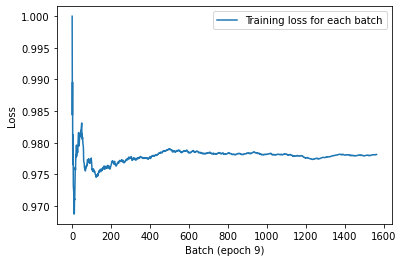

In [70]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

In [97]:
import datetime

In [98]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(
    log_dir= log_dir,
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])


Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4466 - accuracy: 0.8642 - val_loss: 0.1404 - val_accuracy: 0.9604
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1677 - accuracy: 0.9544 - val_loss: 0.1213 - val_accuracy: 0.9674
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1350 - accuracy: 0.9631 - val_loss: 0.1090 - val_accuracy: 0.9727
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1232 - accuracy: 0.9682 - val_loss: 0.1126 - val_accuracy: 0.9740
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1178 - accuracy: 0.9707 - val_loss: 0.1119 - val_accuracy: 0.9743
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1097 - accuracy: 0.9734 - val_loss: 0.1167 - val_accuracy: 0.9758
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1029 - accuracy: 0.9755 - val_loss: 0.1193 - val_accuracy:

In [2]:
ls=list(map(int,input("Enter all the numbers").split()))


Enter all the numbers10 20 30 40 50 


[10, 20, 30, 40, 50]

In [9]:
ls.sort()
lp=[20,10,5,35]
lp.sort()
lp

[5, 10, 20, 35]

In [12]:
5%2

1

In [16]:
total_number= int(input("Enter total number of instance"))
ls=list(map(int,input("Enter all the numbers").split()))
ls.sort()


Enter total number of instance10
Enter all the numbers20 123 125 458 45 158 46 125 456 85


In [33]:
print(ls)
mean= sum(ls)/total_number
lst=[]
if (total_number%2)==0:
    a=total_number//2
    b=a-1
    print("if part",a,b)
    median=(ls[a]+ls[b])/2
else:
    a= (total_number+1)/2
    print("else part",a)
    median= ls[a]/2
for i in range(total_number-1):
    
    if ls[i]==ls[i+1]:
        print("if part",ls[i])
        lst.append(ls[i])
lmt=[]   
if lmt:
    print(lst)
    
print(lst)
print(ls[0])
print("Mean: ",mean)
print("Median: ", median)

[20, 45, 46, 85, 123, 125, 125, 158, 456, 458]
if part 5 4
if part 125
[125]
20
Mean:  164.1
Median:  124.0


In [51]:
"""total_number= int(input())
ls=list(map(int,input().split()))
ls.sort()"""


'total_number= int(input())\nls=list(map(int,input().split()))\nls.sort()'

In [52]:
"""lst=[]
print(lst)
mean= sum(ls)/total_number
if (total_number%2)==0:
    a=total_number//2
    b=a-1
    median=(ls[a]+ls[b])/2
else:
    a= (total_number+1)/2
    median= ls[a]/2
for i in range(len(ls)-1):
    
    if ls[i]==ls[i+1]:
        print(i,ls[i], ls[i+1])
        lst.append(ls[i+1])
       

print(mean)
print(median)
if lst:
    print(lst[0]) 
else:
    print(ls[0])"""

'lst=[]\nprint(lst)\nmean= sum(ls)/total_number\nif (total_number%2)==0:\n    a=total_number//2\n    b=a-1\n    median=(ls[a]+ls[b])/2\nelse:\n    a= (total_number+1)/2\n    median= ls[a]/2\nfor i in range(len(ls)-1):\n    \n    if ls[i]==ls[i+1]:\n        print(i,ls[i], ls[i+1])\n        lst.append(ls[i+1])\n       \n\nprint(mean)\nprint(median)\nif lst:\n    print(lst[0]) \nelse:\n    print(ls[0])'

In [62]:
x = int(input())
y = int(input())
z = int(input())
n = int(input())             

1
1
1
5


In [69]:
lst=[x,y,z]
lst

[1, 1, 1]

In [83]:
ls=[]  
for i in range(1):
    if (x+y+z)!=n:
        ls.append([])
        for j in range(3):
            ls[i].append(lst[j])
        ls.append([])
        for k in range(3):
            ls.append
            
print(ls)


[[1, 1, 1]]
